In [192]:
import tensorflow as tf

In [193]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [194]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [195]:
x_test=x_test/255
x_train=x_train/255

In [196]:
len(x_test),len(x_train)

(10000, 60000)

In [197]:
x_train[0].shape

(28, 28)

In [198]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

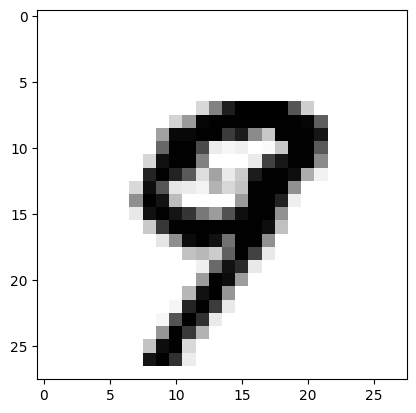

In [199]:
plt.imshow(x_train[87],cmap='binary')

In [200]:
x_train.shape

(60000, 28, 28)

In [201]:
x_train_flatter=x_train.reshape(len(x_train),784)
x_test_flatter=x_test.reshape(len(x_test),784)
x_train_flatter.shape
x_test_flatter.shape

(10000, 784)

In [202]:
model=keras.Sequential([
    keras.layers.Dense(128, input_shape=(784,), activation='relu'),
    keras.layers.Dense(500, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

c:\Users\praka\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [203]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [204]:
model.fit(x_train_flatter,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8919 - loss: 0.3707
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9710 - loss: 0.0944
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9806 - loss: 0.0627
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9857 - loss: 0.0451
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9866 - loss: 0.0378


In [205]:
sample=x_test[0]

In [206]:
sample = sample.reshape(1, 28*28)

In [207]:
prediction = model.predict(x_test_flatter)




313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [208]:
y_pred_label=[]

In [209]:
y_pred_label=np.append(y_pred_label,[np.argmax(i) for i in prediction])

In [210]:
y_pred_label.astype('int64')

array([7, 2, 1, ..., 4, 5, 6])

In [211]:
np.argmax(prediction[87])

np.int64(3)

In [212]:
y_test[87]

np.uint8(3)

In [213]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_label)

In [214]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    0,    2,    2,    0,    0,    2,    1,    1,    0],
       [   1, 1127,    1,    1,    0,    0,    2,    1,    2,    0],
       [   2,    0, 1014,    9,    1,    0,    1,    3,    2,    0],
       [   0,    0,    5, 1001,    0,    1,    0,    2,    0,    1],
       [   1,    0,    5,    0,  955,    0,    3,    9,    1,    8],
       [   2,    0,    0,   28,    0,  847,    4,    2,    6,    3],
       [   1,    3,    2,    1,    6,    2,  942,    1,    0,    0],
       [   1,    3,   10,    4,    0,    0,    0, 1003,    2,    5],
       [   1,    0,    7,   31,    4,    1,    1,    2,  919,    8],
       [   3,    1,    0,   12,   14,    0,    1,    4,    0,  974]],
      dtype=int32)>

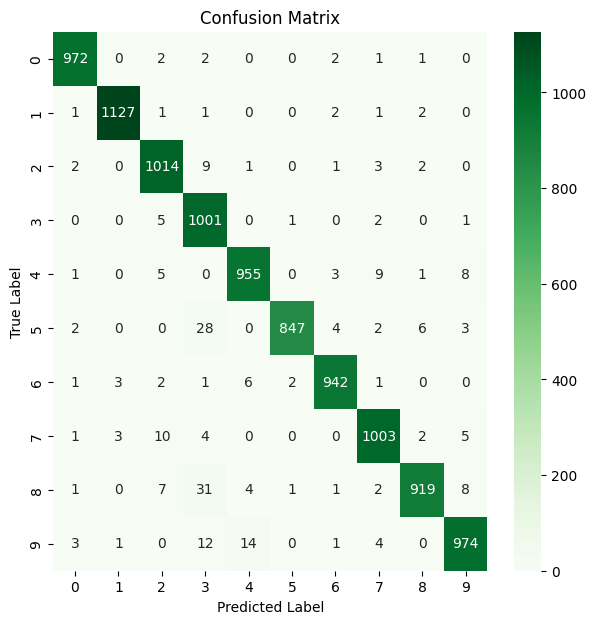

In [215]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
